### 1. Instalar e importar librerías

In [97]:
import mne 
mne.set_log_level('WARNING') # Luego averiguar ¿para qué?
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb #Por ahora lo voy a usar para cambiar los nombres de las columnas
#Paleta de colores Alex
color = ['green', 'blue','red','cyan', 'magenta', 'yellow','k','w']

In [98]:
def to_df(no_df):
    df = pd.DataFrame(no_df) 
    df['sample'] = df.index
    return df

In [163]:
mat = scipy.io.loadmat('./dataset/ERPTemplate.mat') 

In [100]:
routput = mat['routput']

In [101]:
# In this ERPTemplate, there are two different template signals that are good.
erptemplate1 = routput[0][7][0][1][0][0][0][7] 
erptemplate2 = routput[0][7][0][1][0][0][0][0]

In [102]:
# The original ERPTemplate dataset has a sampling frequency of 256 so I need to perform a small downsampling to 250 Hz
erptemplate1 = np.delete( erptemplate1, range(0,256,43),0)
erptemplate2 = np.delete( erptemplate2, range(0,256,43),0)

In [103]:
df_erptemplate1 = to_df(erptemplate1)
df_erptemplate2 = to_df(erptemplate2)

In [104]:
# Use this for testing  (get a ZERO signal)
erptemplate_zeros = np.zeros((250,8))
#erptemplate_zeros
#df_erptemplate_zeros = pd.DataFrame(erptemplate_zeros)
#df_erptemplate1['sample'] = df_erptemplate_alex.index
#df_erptemplate_zeros.head(3)

In [105]:
# Randomize amplitude and jitter.
# Find the right locations where this should be inserted in the stream.
# Insert the signal mantaining the continiuity of the EEG.
def DrugSignal(signal, t_flash):
    '''
    Randomize amplitude and jitter
    Find the right locations where this should be inserted in the stream
    Insert the template mantaining the continuity and physiological meaning of the EEG
    '''
    for i in range(0,4200):
        if (t_flash[i,3]==2):
            signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*3)

    return signal

# DRUG SIGNAL ALEX

In [170]:
def DrugSignal_ALEX(signal, t_flash):
    '''
    Randomize amplitude and jitter
    Find the right locations where this should be inserted in the stream
    Insert the template mantaining the continuity and physiological meaning of the EEG
    '''
    for i in range(0,4200):
        if (t_flash[i,3]==2):
            #signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*3)
            signal[t_flash[i,0]-1:t_flash[i,0]+250-1,:] += (erptemplate1*30)
    return signal

In [174]:
# Now load the basal EEG stream
mat = scipy.io.loadmat('./dataset/p300-subject-25.mat')

*Basal EEG activity: the EEG is the compound summation of myriads of electrical sources from
the CNS. These sources generate a baseline EEG which shows continuous activity with a small or
null relation with any concurrent cognitive activity or task.*

In [175]:
# coding: latin-1
# Data point zero for the eight channels.  Should be in V.
signal = mat['data'][0][0][0]
signal_original = mat['data'][0][0][0]

In [176]:
df_signal_original = to_df(signal_original) 

### *data.flash: Sample point where each flashing starts (sample point id, duration, stimulation, hit/nohit)* 
data.flash: punto de muestra donde comienza cada parpadeo (identificación del punto de muestra, duración, estimulación, hit/nohit)  
Nota: En la función DrugSignal sólo usa el canal 0 y el 3. Por ahora los otros canales no me interesan.

https://www.kaggle.com/datasets/rramele/p300samplingdataset

In [110]:
# Flash matrix
t_flash = mat['data'][0][0][4]
#t_flash
df_t_flash = to_df(t_flash)
df_t_flash.head(5)

,0,1,2,3,sample
0,7499,33,11,1,0
1,7564,32,1,1,1
2,7627,33,9,1,2
3,7690,30,6,1,3
4,7750,33,8,2,4


In [111]:
df_t_flash.describe()

,0,1,2,3,sample
count,4200.000000,4200.000000,4200.000000,4200.000000,4200.000000
mean,181668.002143,30.970238,6.500000,1.166667,2099.500000
std,101288.416332,3.861229,3.452464,0.372722,1212.579894
min,7499.000000,9.000000,1.000000,1.000000,0.000000
25%,93340.750000,30.000000,3.750000,1.000000,1049.750000
50%,181672.500000,32.000000,6.500000,1.000000,2099.500000
75%,269993.000000,32.000000,9.250000,1.000000,3149.250000
max,355828.000000,111.000000,12.000000,2.000000,4199.000000


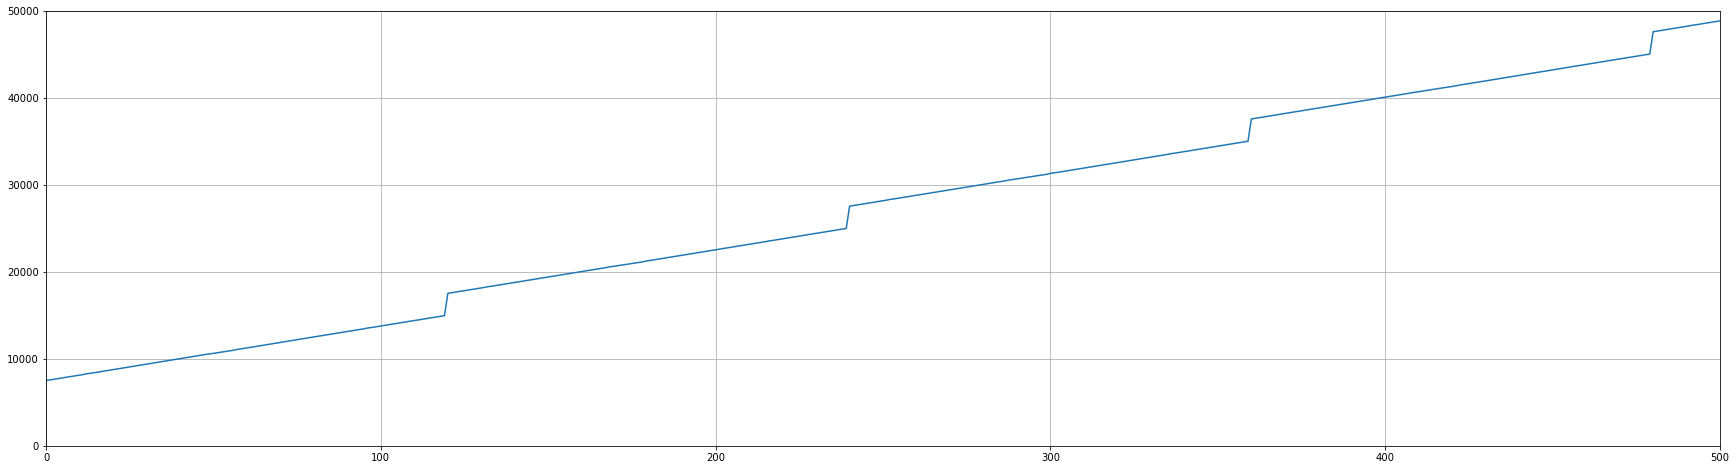

(None, None)

In [112]:
plt.figure(figsize=(30,8))
plt.plot(df_t_flash['sample'], df_t_flash[0])
plt.xlim([0,500])
plt.ylim([0,50000]);
plt.grid(), plt.show()

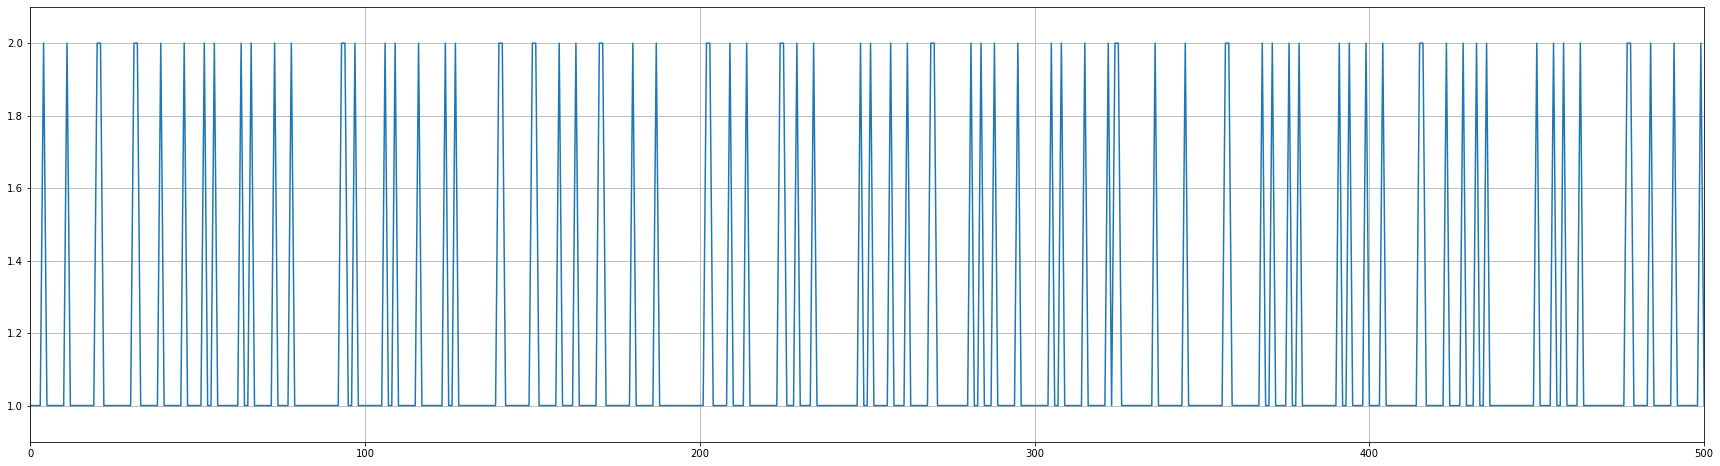

(None, None)

In [113]:
plt.figure(figsize=(30,8))
plt.plot(df_t_flash['sample'], df_t_flash[3])
plt.xlim([0,500])
plt.ylim([0.9,2.1]);
plt.grid(), plt.show()

In [171]:
DrugSignal_ALEX = DrugSignal_ALEX(signal, t_flash)
df_DrugSignal_ALEX = to_df(DrugSignal_ALEX)
#df_DrugSignal_ALEX.head(20)
#df_signal_ALEX.describe()

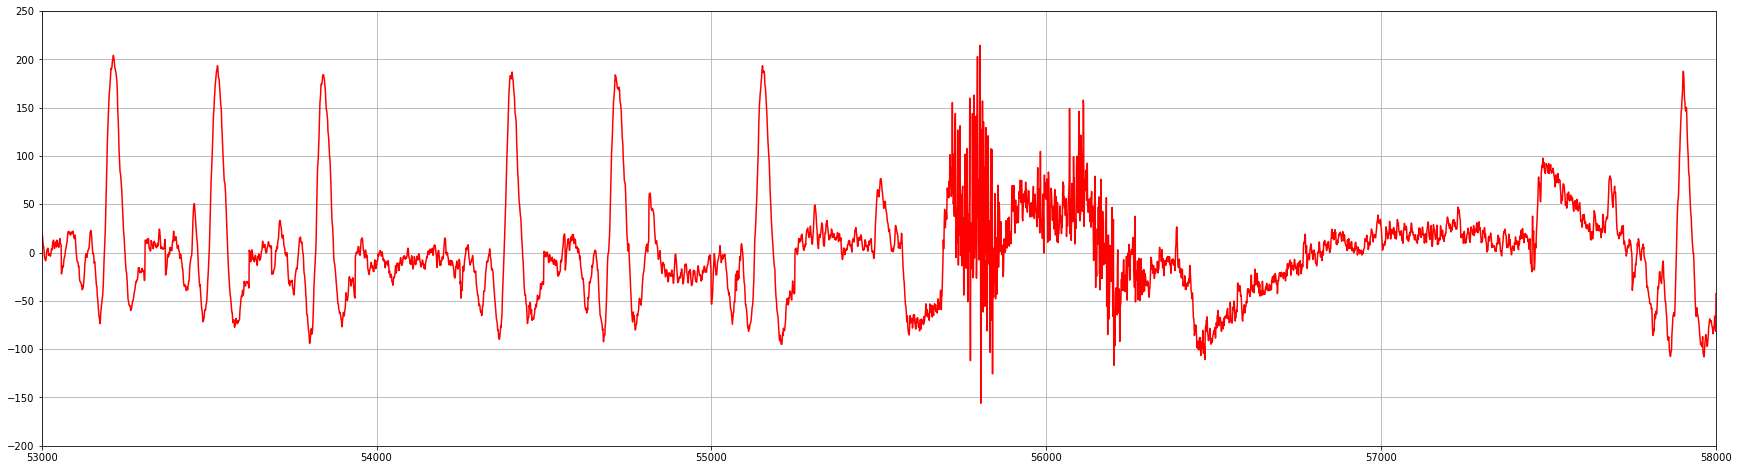

(None, None, None)

In [178]:
plt.figure(figsize=(30,8))
plt.plot(df_DrugSignal_ALEX['sample'], df_DrugSignal_ALEX[0], color[2])
#plt.xlim([0,70000])
plt.xlim([53000,58000])
plt.ylim([-200,250]);
plt.grid(), plt.savefig("Con amplitud modificada.jpg"), plt.show()

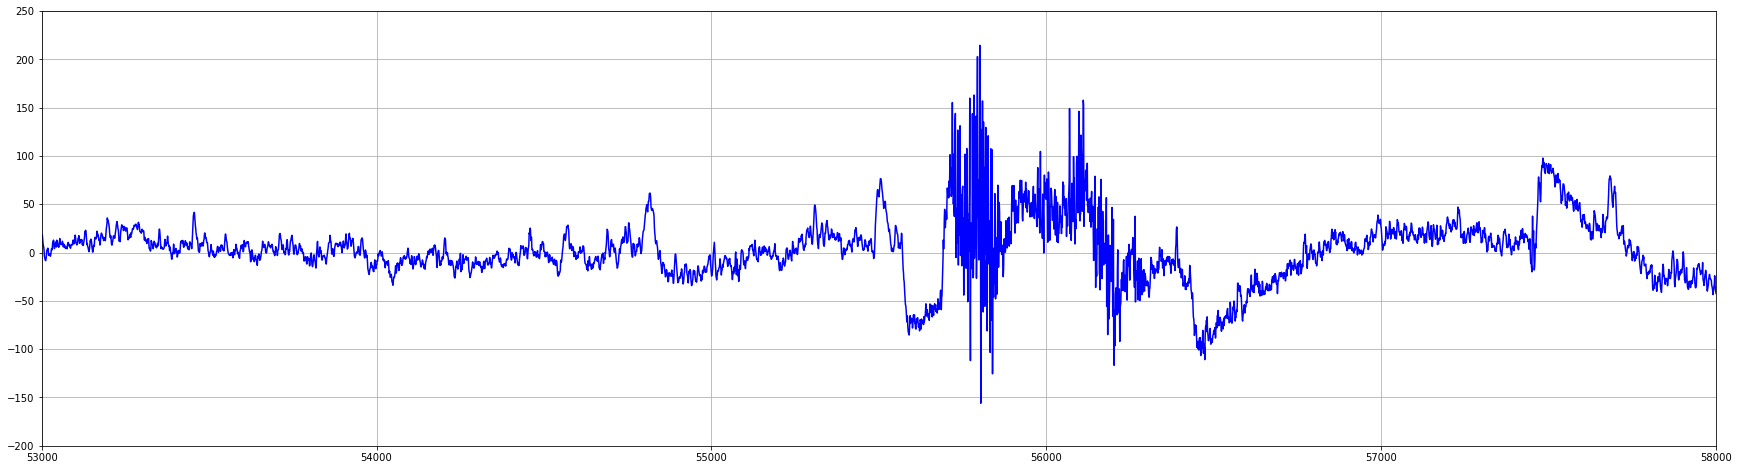

(None, None, None)

In [179]:
plt.figure(figsize=(30,8))
plt.plot(df_signal_original['sample'], df_signal_original[0], color[1])
#plt.xlim([0,70000])
plt.xlim([53000,58000])
plt.ylim([-200,250]);
plt.grid(), plt.savefig("Señal original.jpg"),plt.show()